In [ ]:
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

In [1]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [2]:
# ord() converts integer to ASCII character
def phred33ToQ(qual):
    return ord(qual) - 33

def qToPhred33(Q):
    return char(Q + 33)

In [3]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


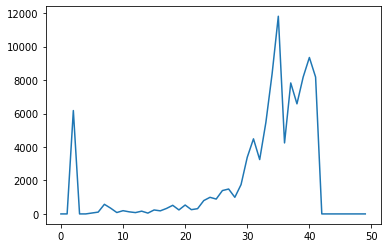

In [4]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

# I'm guessing that what's happening at a quality value of 2, is that these are clusters where the base caller was not confident at all at what the base ought to be there.
# For example, if it was an equal mix of colors coming from that cluster, it will have very low confidence.
# And so that probability that the call is incorrect it's going to be high, that corresponds to a very low Q value.
# We see that fairly often toward the ends of the reads, for reasons that we discussed in the previous optional lecture.